6800.0
5499000.0


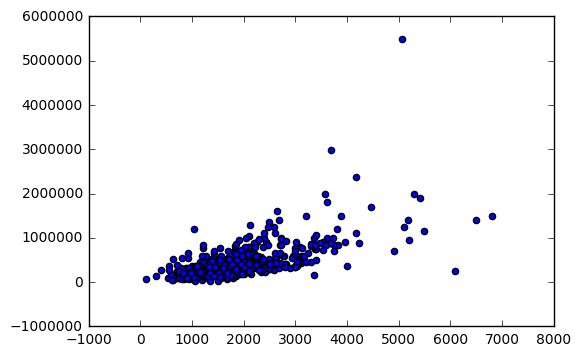

In [282]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("HousesRegr.csv", skiprows = 1, delimiter=';');
# ID, Bedrooms, Bathrooms, Size, Price

def loadData(feature):
    if feature == "Bedrooms":
        index = 1
    elif feature == "Bathrooms":
        index = 2
    elif feature == "Size":
        index = 3
    else:
        print("invalid input")
        exit

    x = data[:,index]
    return(x)

def plotData(x,y):
    plt.scatter(x,y)
    plt.show()


x = loadData("Size")
y = data[:,4]
print(max(x))
print(max(y))
plotData(x,y)


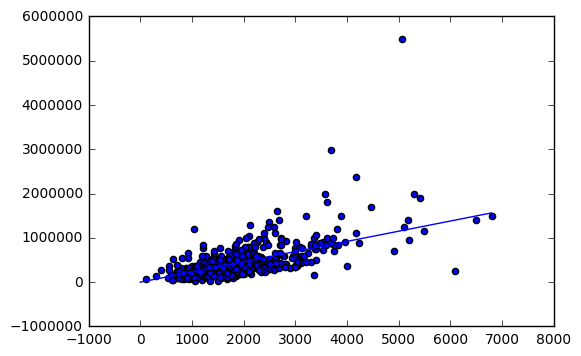

In [285]:
def gradientStep(theta_0, theta_1, x, y, alpha):
    n = len(x)
    sum_theta_0 = 0
    sum_theta_1 = 0
    cost_sum = 0.0
    for i in range(0, len(x)):
        sum_theta_0 += theta_1 * x[i] + theta_0 - y[i]
        
        sum_theta_1 += x[i] * (theta_1 * x[i] + theta_0 - y[i])
        
        cost_sum += (theta_1 * x[i] + theta_0 - y[i])**2
        
    new_theta_0 = theta_0 - ((1/n)*sum_theta_0 * alpha)
    new_theta_1 = theta_1 - ((1/n)*sum_theta_1 * alpha)
    cost = cost_sum / (2*n)
    return [new_theta_0, new_theta_1, cost]
    
def gradientIter(theta_0, theta_1, x, y, alpha, n_iter):   
    while n_iter > 0:
        step = gradientStep(theta_0, theta_1, x, y, alpha) 
        theta_0 = step[0]
        theta_1 = step[1]
        cost = step[2]
#         print(cost)
#         print("theta 0: " , theta_0)
#         print("theta 1: " , theta_1)
        n_iter -= 1
    return step
  
def gradientVec(x, y, theta, alpha, n_iter):
    n = len(x)
    # create design matrix
    X = np.ones((len(x), 2))
    for i in range(0,len(x)):
        X[i, 1] = x[i]
    X = np.asmatrix(X)
    
    for i in range(0, n_iter):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
#         print(X.T[1:,:])
        gradient = np.sum(np.dot(X.T[1:,:], loss) / n)
        print(gradient)
        
        theta = theta - np.dot(alpha, gradient)
    return theta    
    
# initial theta values    
theta = np.matrix([[0],[1]])
# para = gradientVec(x, y, theta, 0.0001, 1)
# print(para)

parameters = gradientIter(0, 1, x, y, 0.0000001, 150)
# print(parameters)

xvals = np.arange(max(x))
yvals = parameters[0] + parameters[1] * xvals
# yvals = para[1] * xvals

plt.scatter(x,y)
# plt.axis([0, max(x), 0, max(y)])
plt.plot(xvals, yvals)
# plt.plot(parameters)
plt.show()